# Задачи классификации и кластеризации
Булыгин Олег

2023-07-25

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Классификация

### Дискриминантный анализ

In [2]:
# загружаем базу данных wine и выводим описание датасета
wine = load_wine()
#print(wine.DESCR)

In [3]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
# и отдельно загружаем в виде массива целевую переменную
data_class = wine.target

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

In [7]:
len(y_test)

45

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [12]:
result.head()

,0,1
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1


### Метрики качества модели

**accuracy** - это самая распространенная метрика качества. Математически - это доля правильных прогнозов от всего количества прогнозов.

**Увага!** На **несбалансированных** данных лучше использовать не **accurasy**, а другие метрики качества модели!

In [13]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [14]:
# коэффициенты дискриминантных линий
lda.coef_

array([[ 2.77785654e+00, -2.62823777e-01,  6.34033699e+00,
        -9.23264800e-01,  1.12148061e-03, -1.73622434e+00,
         4.95743646e+00,  3.14554165e+00, -1.19253447e+00,
        -8.98034416e-01, -1.73258088e-01,  3.81064150e+00,
         1.36856107e-02],
       [-2.00764892e+00, -4.89578703e-01, -6.54854947e+00,
         4.49722072e-01,  4.06933168e-05, -7.56394603e-01,
         1.34633325e+00,  2.67670321e+00,  1.06737575e+00,
        -6.98689535e-01,  3.51943073e+00,  4.92874648e-01,
        -5.99014310e-03],
       [-4.39452636e-01,  1.04199771e+00,  1.89161928e+00,
         4.66343927e-01, -1.43060813e-03,  3.23563291e+00,
        -8.04119074e+00, -7.78525286e+00, -1.13872164e-01,
         2.12622388e+00, -4.96962424e+00, -5.38307173e+00,
        -7.90803569e-03]])

In [15]:
# визуализация дискриминантных линий только по 2 признакам
small_train = X_train[['ash', 'flavanoids']]
small_test = X_test[['ash', 'flavanoids']]

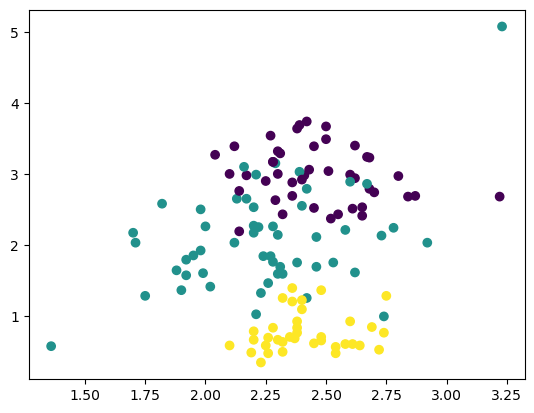

In [16]:
plt.scatter(
    x=small_train['ash'],
    y=small_train['flavanoids'],
    c=y_train
)
#plt.legend()
plt.show()

In [17]:
# обучим модиль только на этих двух признаках
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45795455, 2.98522727],
       [2.24735849, 2.07150943],
       [2.41416667, 0.76888889]])

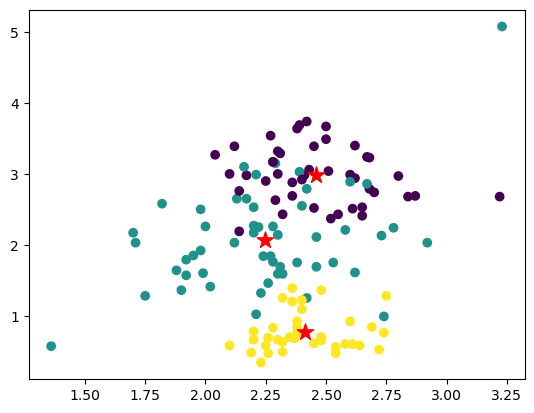

In [19]:
#  построим график с центроидами
plt.scatter(
    x=small_train['ash'],
    y=small_train['flavanoids'],
    c=y_train
)
plt.scatter(
    lda_small.means_[:,0],
    lda_small.means_[:,1],
    c='r', s=150, marker='*'
)

In [20]:
lda_small.coef_

array([[-0.35930524,  3.52752381],
       [-1.82165655,  0.40785359],
       [ 3.1210341 , -4.9118691 ]])

In [21]:
# какая будет точность этой модели?
accuracy_score(y_test, lda_small.predict(small_test))

0.8

In [22]:
# оценим корреляцию празнаков друг с другом
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


### Логистическая регрессия

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train, y_train)

/home/andrew/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[9.73067203e-01, 1.30618394e-02, 1.38709577e-02],
       [9.88784150e-01, 1.42686917e-03, 9.78898124e-03],
       [4.84491458e-02, 2.30996350e-01, 7.20554504e-01],
       [9.96850907e-01, 1.24762390e-03, 1.90146941e-03],
       [6.37663483e-02, 9.07851033e-01, 2.83826184e-02],
       [9.94127474e-01, 3.39607679e-04, 5.53291791e-03],
       [1.40142983e-02, 9.85599014e-01, 3.86687685e-04],
       [5.42638129e-03, 3.17422922e-04, 9.94256196e-01],
       [4.43832047e-02, 9.55353350e-01, 2.63445592e-04],
       [1.54139186e-01, 1.44733104e-02, 8.31387503e-01],
       [4.85179105e-01, 5.12883085e-01, 1.93781048e-03],
       [1.13324555e-04, 2.21974796e-04, 9.99664701e-01],
       [9.92550072e-01, 3.63470078e-03, 3.81522680e-03],
       [6.17146023e-02, 8.01472495e-01, 1.36812903e-01],
       [9.93260767e-01, 1.14165281e-05, 6.72781652e-03],
       [2.88609367e-04, 9.99626376e-01, 8.50151014e-05],
       [1.75622046e-03, 9.97068558e-01, 1.17522175e-03],
       [2.90945963e-03, 9.96773

In [26]:
lr.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [27]:
accuracy_score(y_test, lr.predict(X_test))

0.9777777777777777

In [28]:
lr.coef_

array([[ 9.30887614e-04,  1.68583766e-01,  1.29250735e-01,
        -2.50138694e-01, -2.52902076e-02,  1.96627900e-01,
         4.02185949e-01, -8.90741392e-03,  4.83941705e-02,
         2.10312085e-02, -3.95097306e-03,  2.43174764e-01,
         7.10143352e-03],
       [ 2.30359820e-01, -5.08681510e-01, -1.38185066e-01,
         2.40687838e-01,  1.08032180e-02,  1.61483020e-01,
         3.03340380e-01,  8.41679283e-03,  2.80627161e-01,
        -1.09362358e+00,  1.88909992e-01,  3.79263989e-01,
        -6.31940925e-03],
       [-2.31290708e-01,  3.40097744e-01,  8.93433072e-03,
         9.45085606e-03,  1.44869896e-02, -3.58110920e-01,
        -7.05526328e-01,  4.90621087e-04, -3.29021332e-01,
         1.07259237e+00, -1.84959018e-01, -6.22438753e-01,
        -7.82024268e-04]])

## Кластеризация

### Подготовка данных (мастабирование)

In [29]:
df = pd.read_csv('stat_datas/characters_stats.csv', index_col='Name')
df

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Name,,,,,,,,
A-Bomb,good,38,100,17,80,17,64,316
Abomination,bad,63,80,53,90,55,95,436
Adam Strange,good,1,1,1,1,0,1,5
Agent 13,good,1,1,1,1,0,1,5
Agent Zero,good,75,28,38,80,72,95,388
...,...,...,...,...,...,...,...,...
Winter Soldier,good,56,32,35,65,60,84,332
Wolverine,good,55,32,38,100,44,100,369
Wonder Woman,good,88,100,50,100,42,100,480


<Axes: xlabel='Strength', ylabel='Speed'>

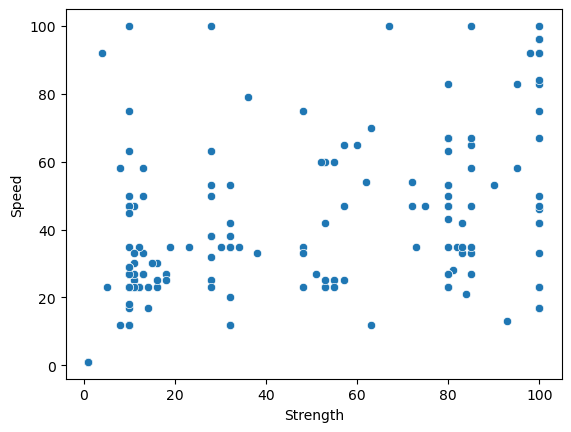

In [30]:
# попробуем классифицировать героев по силе и скорости
X = df[['Strength', 'Speed']]
sns.scatterplot(
    x=df['Strength'],
    y=df['Speed']
)

In [31]:
# приведем данные к одному масштабу
scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.67567212, -0.78116524],
       [ 1.1076973 ,  0.67019364],
       [-1.13580327, -1.42621363],
       [-1.13580327, -1.42621363],
       [-0.36903725,  0.06546077],
       [ 1.1076973 , -0.53927209],
       [-0.8802146 , -0.78116524],
       [-1.13580327, -1.42621363],
       [ 1.1076973 ,  0.42830049],
       [-0.8802146 , -0.53927209],
       [ 0.53972247,  1.15397993],
       [ 1.67567212, -0.13611685],
       [ 1.1076973 ,  0.54924707],
       [-0.79501837,  0.87177126],
       [ 1.16449478, -0.0554858 ],
       [-0.8802146 , -0.98274286],
       [ 0.62491869, -0.98274286],
       [-1.13580327, -1.42621363],
       [-0.85181585,  0.42830049],
       [ 0.34093128, -0.53927209],
       [-1.13580327, -1.42621363],
       [-0.65302466, -0.37800999],
       [-0.36903725,  0.54924707],
       [ 1.67567212, -0.53927209],
       [ 1.67567212,  2.24249909],
       [ 0.73851366,  2.56502329],
       [-1.13580327, -1.42621363],
       [-0.70982215, -0.25706342],
       [-0.79501837,

### Метод К-средних

- Задаем количество кластеров заранее
- Плохо работает на невыпуклых кластерах
- Очень чувствителет к размерности

<Axes: >

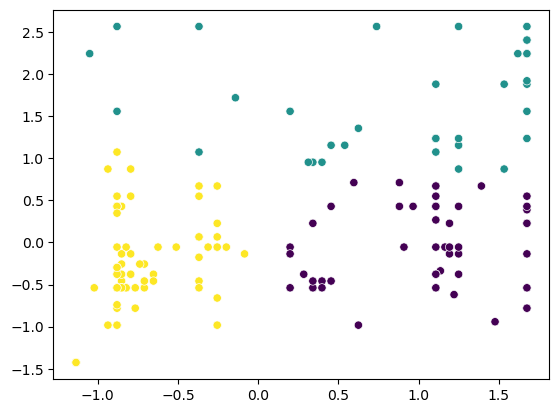

In [32]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# обучим и подскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
X.insert(0, 'Clusters_K3', predictions)

sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    c=predictions
)

In [33]:
predictions

array([0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2], dtype=int32)

In [34]:
X.head()

,Clusters_K3,Strength,Speed
Name,,,
A-Bomb,0,100,17
Abomination,0,80,53
Adam Strange,2,1,1
Agent 13,2,1,1
Agent Zero,2,28,38


### График локтя

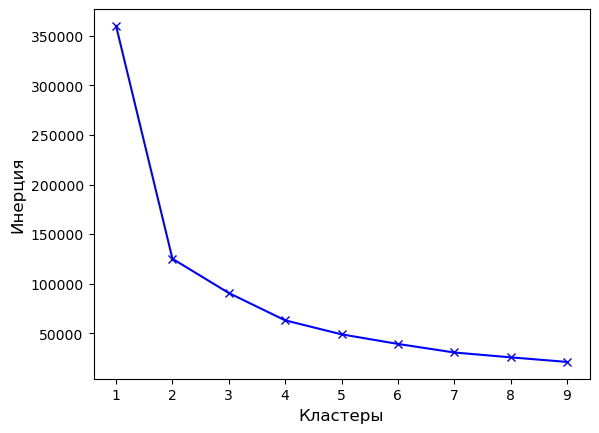

In [35]:
# Функция, которая принимает количество кластеров для k-means и мартицу объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X))

# визулизируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show();

### График силуета

<Axes: xlabel='cluster', ylabel='silhouette'>

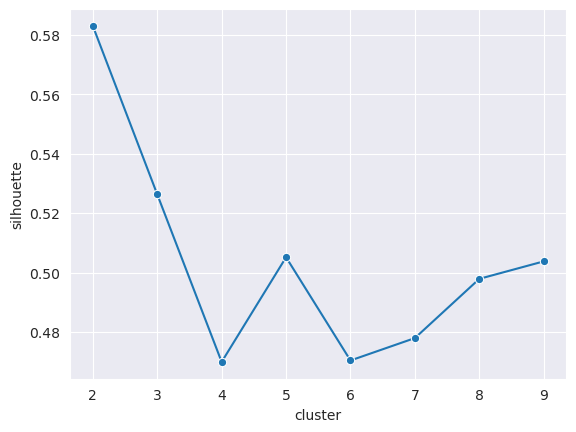

In [36]:
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, n_init=10, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

X = df[['Strength', 'Speed']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

silhouette_df = pd.DataFrame(silhouette_res)

sns.set_style("darkgrid")
sns.lineplot(
    data=silhouette_df,
    x='cluster',
    y='silhouette',
    marker='o'
            )


### Иерархический алгоритм

Расстояние между классами
- Ближнего соседа
- Дальнего соседа
- Групповое среднее
- Расстояние между центрами
- **Расстояние Уорда**

Подсчет расснояния чувствитетен к размерности.

In [37]:
X.head()

,Strength,Speed
Name,,
A-Bomb,100,17
Abomination,80,53
Adam Strange,1,1
Agent 13,1,1
Agent Zero,28,38


In [38]:
clustering = AgglomerativeClustering()

# определим, к какому кластеру принадлежать покемоны
predictions = clustering.fit_predict(X)
predictions


array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [39]:
predictions = clustering.labels_
predictions

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

<Axes: xlabel='Strength', ylabel='Speed'>

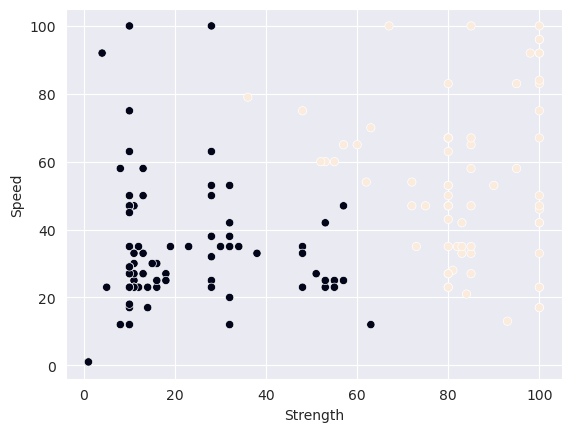

In [40]:
# визуализация результата
sns.scatterplot(x=df['Strength'], y=df['Speed'], c=predictions)

In [41]:
X.insert(0, 'Clusters_agg', predictions)

In [42]:
X

,Clusters_agg,Strength,Speed
Name,,,
A-Bomb,1,100,17
Abomination,1,80,53
Adam Strange,0,1,1
Agent 13,0,1,1
Agent Zero,0,28,38
...,...,...,...
Winter Soldier,0,32,35
Wolverine,0,32,38
Wonder Woman,1,100,50


### Дендрограмма

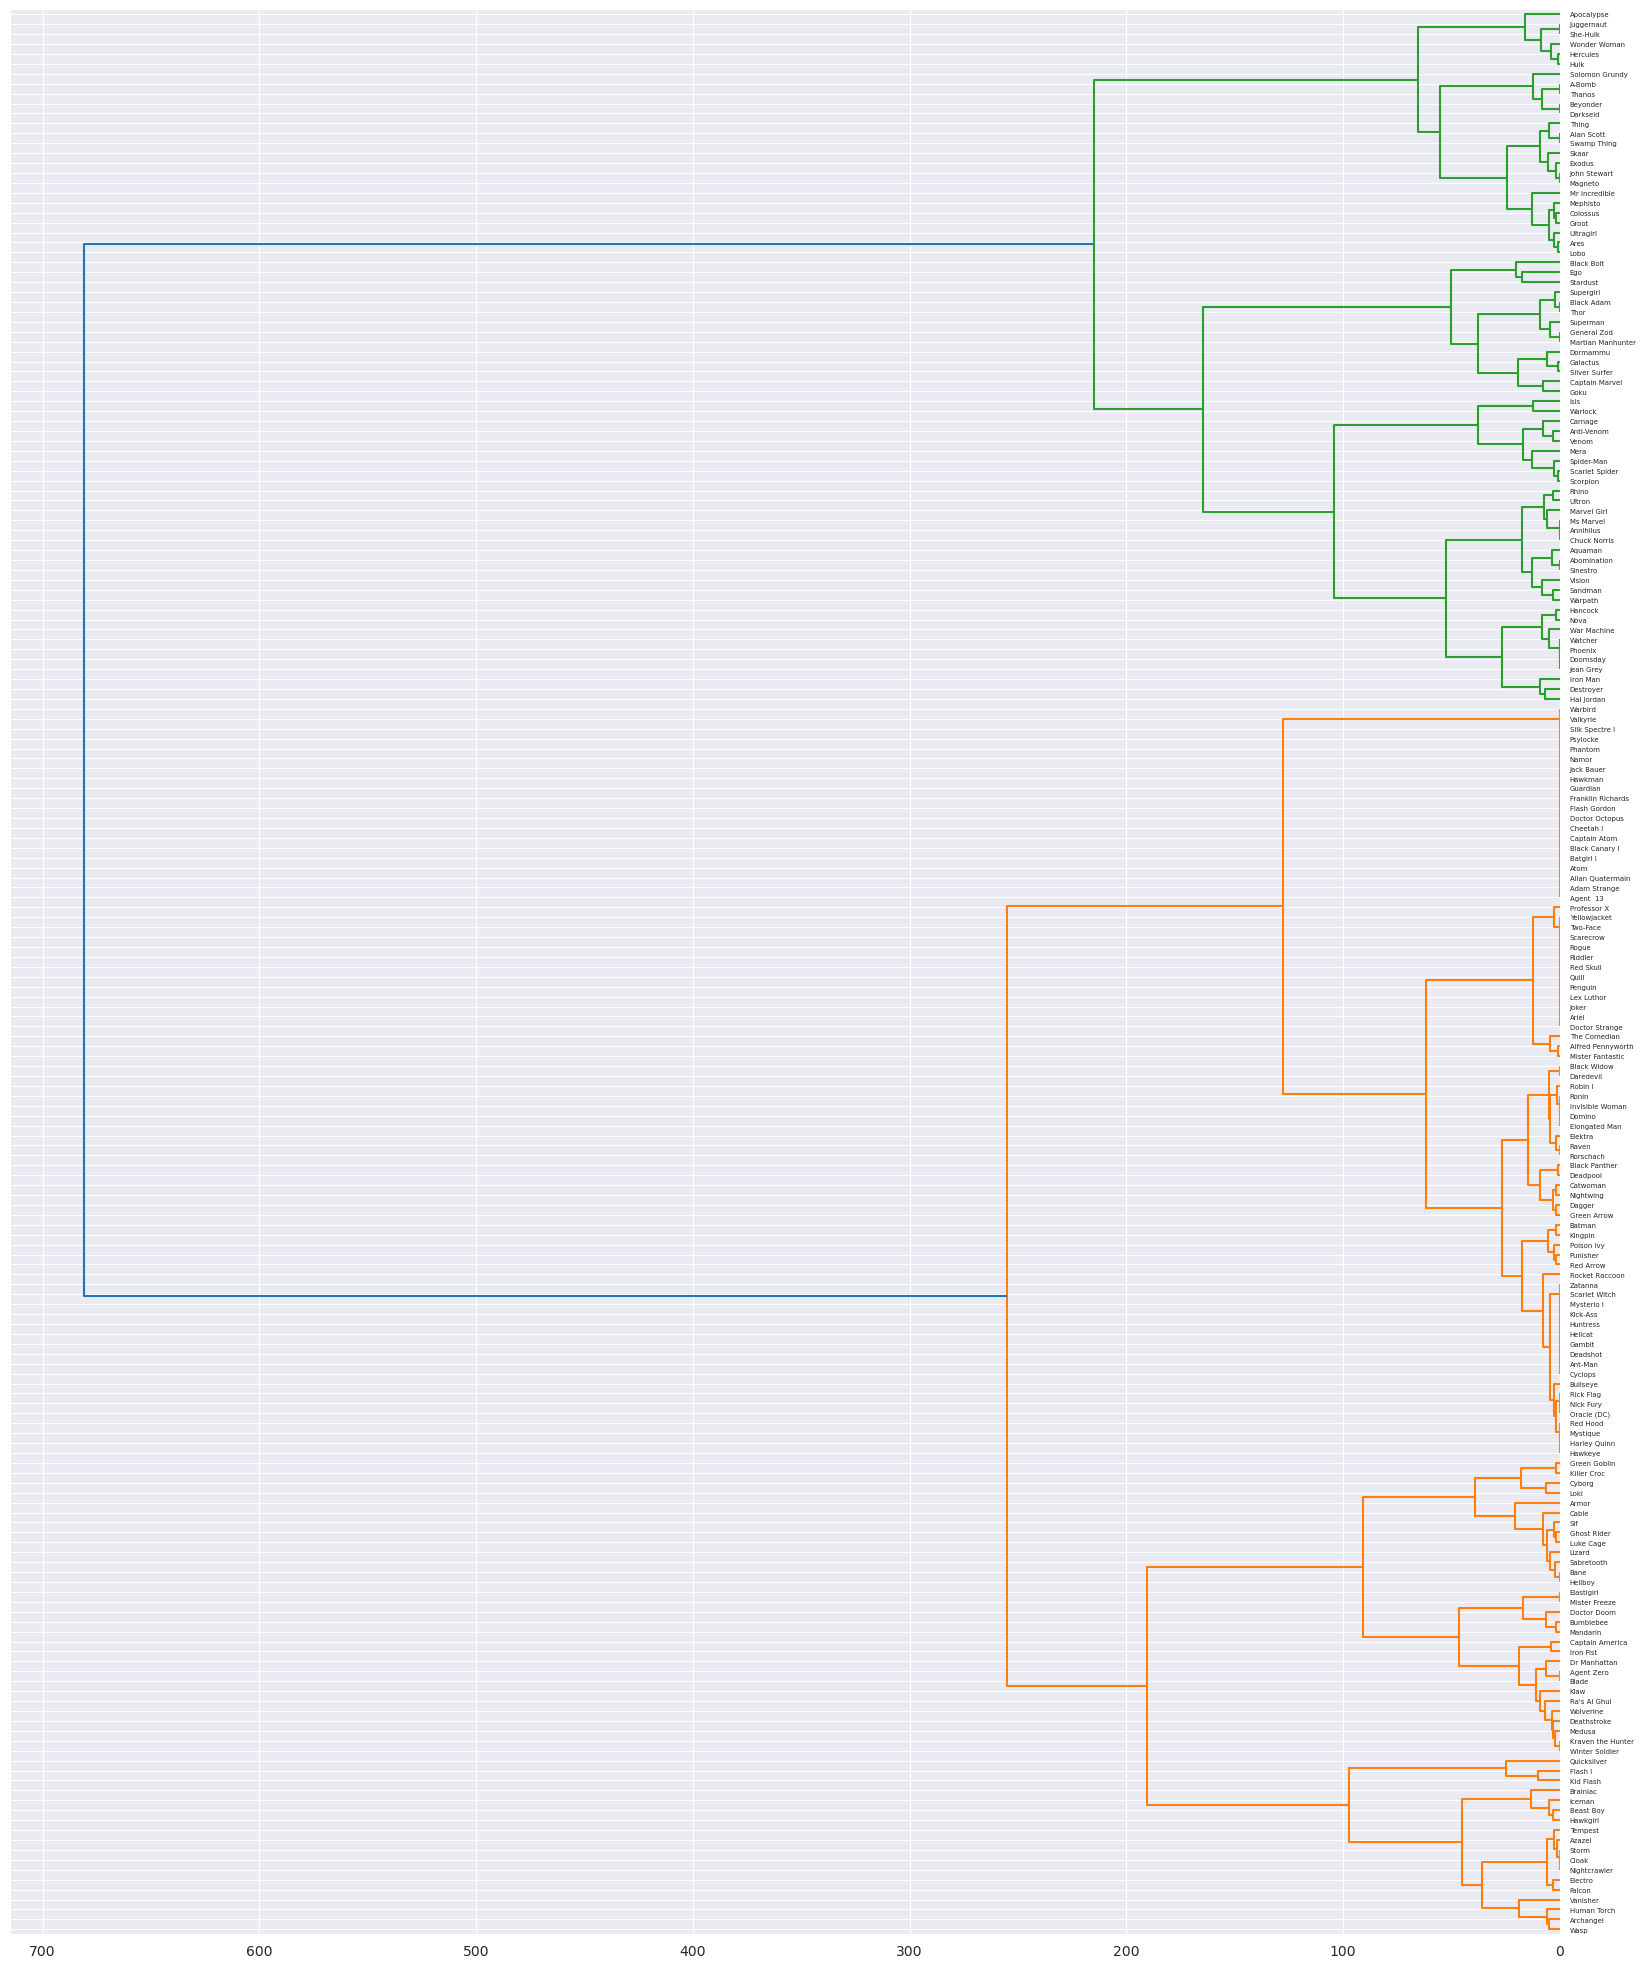

In [43]:
# рассчитаем расстояние между кластерами
linked = linkage(X, 'ward')

plt.figure(figsize=(20, 25))

# сначала будут отрисоваваться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
           orientation='left',
           labels=df.index,
           distance_sort='descending'
          )
plt.show()